# Part I - Prosper Loan Data Analysis
## by Jessie Ifeanyi

## Introduction

I have chosen to analyze the Proper Loan data set. Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $18 billion in loans to more than 1,060,000 people. The original dataset we are exploring contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables. I have refined and dropped some columns that I will not be using for this exploration before starting.

Here, we try to answer questions like:
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?



**Primary Variables:**
Loan Status
Borrower APR
Prosper Score

**Secondary Variables:**
Credit Rating
Listing Category
Employment Status
Credit Range
Income Range
Homeowner Status

## Preliminary Wrangling
We will first import the data set and wrangle to clean and correct issues with the data set. Let's start by importing the packages we need;

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime
import seaborn as sb
from matplotlib import rcParams
import requests
from sqlalchemy import create_engine

%matplotlib inline

> Here, I load in the dataset and describe its properties through the questions below. I am also looking through the data set for abnormalities and to drop columns that are not neccesary for this exploration

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 64 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
CreditGrade                            28953 non-null object
ProsperRating (Alpha)                  84853 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperScore           

In [4]:
#checking for columns with null values
loans.isna().sum()

ListingKey                                  0
ListingNumber                               0
CreditGrade                             84984
ProsperRating (Alpha)                   29084
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner                         0
CurrentlyInGroup                  

In [5]:
# Let's drop the column that do not have any NaN/None values
loans=loans.drop(['ListingKey', 'ListingNumber', 'CurrentlyInGroup','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment', 'BorrowerRate', 'LenderYield', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'LoanKey', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'PercentFunded', 'Investors', 'LoanCurrentDaysDelinquent'], axis=1)
loans

,CreditGrade,ProsperRating (Alpha),Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,TradesOpenedLast6Months,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanFirstDefaultedCycleNumber
0,C,NaN,36,Completed,14/08/2009 00:00,0.16516,NaN,NaN,NaN,NaN,...,0.0,0.17000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A,36,Current,NaN,0.12016,0.07960,0.0249,0.05470,6.0,...,2.0,0.18000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HR,NaN,36,Completed,17/12/2009 00:00,0.28269,NaN,NaN,NaN,NaN,...,NaN,0.06000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,A,36,Current,NaN,0.12528,0.08490,0.0249,0.06000,6.0,...,0.0,0.15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,D,36,Current,NaN,0.24614,0.18316,0.0925,0.09066,3.0,...,2.0,0.26000,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN
5,NaN,B,60,Current,NaN,0.15425,0.11567,0.0449,0.07077,5.0,...,0.0,0.36000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,E,36,Current,NaN,0.31032,0.23820,0.1275,0.11070,2.0,...,0.0,0.27000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,C,36,Current,NaN,0.23939,0.17830,0.0799,0.09840,4.0,...,0.0,0.24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,AA,36,Current,NaN,0.07620,0.05221,0.0099,0.04231,7.0,...,1.0,0.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,AA,36,Current,NaN,0.07620,0.05221,0.0099,0.04231,7.0,...,1.0,0.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Exploring the datatypes of each column

print(loans.dtypes)

CreditGrade                             object
ProsperRating (Alpha)                   object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHomeowner                       bool
GroupKey                                object
CreditScoreRangeLower                  float64
CreditScoreRangeUpper                  float64
CurrentCreditLines                     float64
OpenCreditLin

In [7]:
#This shows the number of unique values in each column
loans.nunique()

CreditGrade                                8
ProsperRating (Alpha)                      7
Term                                       3
LoanStatus                                12
ClosedDate                              2802
BorrowerAPR                             6677
EstimatedEffectiveYield                 1582
EstimatedLoss                            120
EstimatedReturn                         1476
ProsperRating (numeric)                    7
ProsperScore                              11
ListingCategory (numeric)                 21
BorrowerState                             51
Occupation                                67
EmploymentStatus                           8
EmploymentStatusDuration                 605
IsBorrowerHomeowner                        2
GroupKey                                 706
CreditScoreRangeLower                     26
CreditScoreRangeUpper                     26
CurrentCreditLines                        54
OpenCreditLines                           52
TotalCredi

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 45 columns):
CreditGrade                            28953 non-null object
ProsperRating (Alpha)                  84853 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperScore                           84853 non-null float64
ListingCategory (numeric)              113937 non-null int64
BorrowerState                          108422 non-null object
Occupation                             110349 non-null object
EmploymentStatus         

In [9]:
# descriptive statistics for numeric variables
loans.describe()

,Term,BorrowerAPR,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,...,TradesOpenedLast6Months,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanFirstDefaultedCycleNumber
count,113937.000000,113912.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,...,106393.000000,105383.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,16952.000000
mean,40.830248,0.218828,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,...,0.802327,0.275947,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,16.268464
std,10.436212,0.080364,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,...,1.097637,0.551759,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,9.005898
min,12.000000,0.006530,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.156290,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,26.000000,660.000000,...,0.000000,0.140000,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000,0.000000,9.000000
50%,36.000000,0.209760,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,67.000000,680.000000,...,0.000000,0.220000,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000,1626.550000,14.000000
75%,36.000000,0.283810,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,137.000000,720.000000,...,1.000000,0.320000,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000,4126.720000,22.000000
max,60.000000,0.512290,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,880.000000,...,20.000000,10.010000,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,23450.950000,44.000000


### What is the structure of your dataset?
There are 113937 loans in the dataset with 81 features; We have dropped some colums to make the dataset easier to work with. We will be working with 113937 loans in the dataset with 43 features as listed below;

(CreditGrade, ProsperRating (Alpha), Term,	LoanStatus, ClosedDate, BorrowerAPR,  EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperScore, BorrowerState,	Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, InquiriesLast6Months, TotalInquiries,  CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years,	PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber). 

Based on the Prosper Loan Data - Variable Definitions file, we have a substantial amount of data before and after 2009. We might need to look at an analysis before and after 2009.


### The main feature(s) of interest in the Prosper Loan Dataset?

I'm most interested in figuring out what factors affect a loan’s outcome status, what affects the borrower’s APR or interest rate, if there are differences between loans depending on employment status.

* Qualitative Variables:

LoanStatus - Whether a loan is Cancelled, Chargedoff (The worst one), Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue.

* Quantitative Variables:

BorrowerAPR - Effective rate that the borrower pays per year, plus servicing fees. There is a BorrowerRate variable, but this doesn't account for the servicing fee. <br>
ProsperScore - Custom score, based on historical data, from 1-10. 10 is the best, or lowest risk. (Post-2009 only) <br>
CreditGrade (Pre-2009 only) 

### Features that will support this investigation into our feature(s) of interest

The following variables might have some impact on the type of loan that gets issued (i.e. things that affect Features of Interest), hence consequently affect the loan's outcome status:

#### Qualitative Variables:

* Term - Months of loan; Although this sounds quantitative, there are only 12 month, 36 month, and 60 month loans.

* CreditGrade (Pre-2009 only) 

* ProsperRating (Alpha) - Prosper Rating assigned to loan at the beginning. There is a numeric version, but since we're dealing with a categorical datatype, we will opt to just look at the Alpha version. (Post 2009 only)

* CreditRating - Combined variable between CreditGrade and ProsperRating (Alpha). We will check to see if our analysis shows anything different with this variable.

* ListingCategory (numeric) - Type of listing that the loan falls under, which includes: 
  0 - Not available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

* BorrowerState - 2 letter abbreviation of where the loan was created for (Might be interesting to pair with the statuses)

* EmploymentStatus - of Borrower

* CreditRange - Since the delta value between the Upper value and the Lower value is 19 for all of the rows, we can safely just create a range between these bounds.


#### Quantitative Variables:
Others include;

* DebtToIncomeRatio - Based on when credit profile was pulled, and capped at 10.01 (1001 %)

* TotalProsperPaymentsBilled - Number of on time payments

* InvestmentFromFriendsCount - Number of friends that invested in a loan

* Investors - Number of Lenders

We are removing ClosedDate - We won't need to worry too much about the date that a loan stopped. This variable only applies to loans that are Cancelled, Completed, Chargedoff, and Defaulted

## Univariate Exploration

> In this section, we investigate distributions of individual variables.


### Exploring our feature(s) of interest

In [10]:
# Let's first examine our primary variable of interest

counts=loans['LoanStatus'].value_counts()

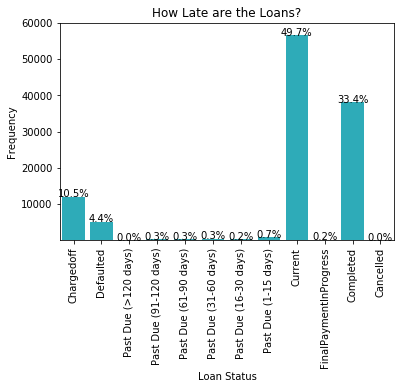

In [11]:
# Let's reorder this categorical data from worst to best, based on level of lender distaste. 
# A cancelled loan doesn't necessarily impact the lender negatively, 
# other than for the fact that the lender has to find another borrower. 
# So we place Cancelled last, to represent a 'neutral' status.

ls_order = ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)',
            'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)', 
            'Past Due (1-15 days)', 'Current', 'FinalPaymentInProgress', 'Completed', 'Cancelled']

# We can now view this on the bar chart

default_color = sb.color_palette()[9]

ax = sb.countplot(data = loans, x = 'LoanStatus', color = default_color, order = ls_order)
for i in range(len(ls_order)):
    count = counts[ls_order[i]]
    #print(ls_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.title('How Late are the Loans?')

plt.xticks(rotation = 90)
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000]);
plt.xlabel('Loan Status')
plt.ylabel('Frequency');

# fig.savefig('output1.png', bbox_inches='tight');

Of the Loans, we see that 10.5% of the loans has been considered bad debts and written off. 33% of the loans has been completed while 49.7% are still ongoing. Of the current loans it seems only a few a late but almos none is past 120days due.

In [12]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

The loans are typically between 12 months (1 year) to 60 months (5 years). Now lets reorder these terms so we can see what they say about the dataset. 

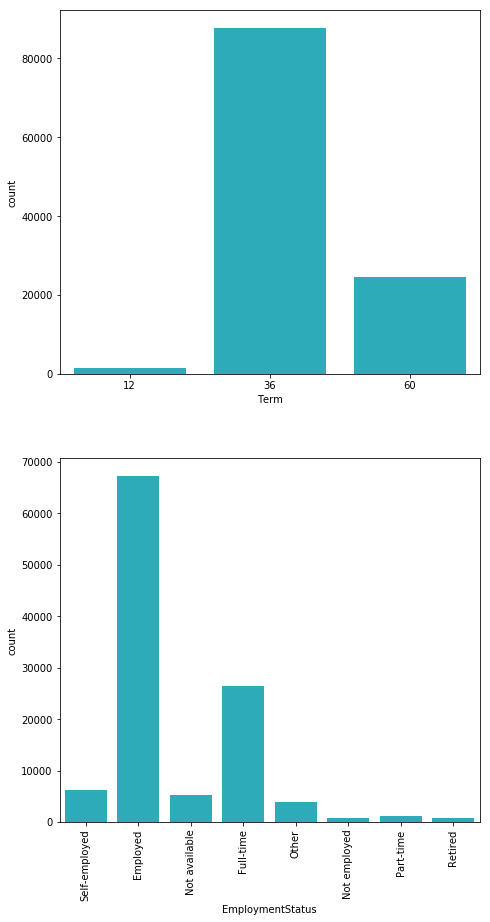

In [13]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8, 14])
default_color = sb.color_palette()[9]

freq = loans['LoanStatus'].value_counts()

# Get the indexes of the Series
status_order = freq.index

default_color = sb.color_palette()[9]

sb.countplot(data=loans, x='Term', color = default_color, ax = ax[0])
sb.countplot(data=loans, x='EmploymentStatus', color = default_color, ax = ax[1])

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

# using padding
fig.tight_layout(pad=5.0)

fig.savefig('output2.png', bbox_inches='tight');

plt.show()

In [14]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [15]:
es_order= loans.EmploymentStatus.value_counts().index
es_counts= loans.EmploymentStatus.value_counts()

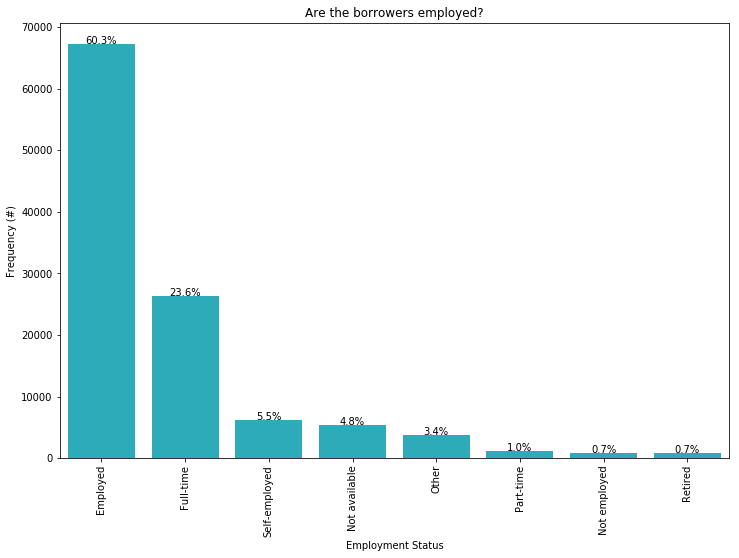

In [16]:
fig = plt.figure(figsize = [12, 8])

ax_6 = sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color,
                    order = es_order)

for i in range(len(es_order)):
    count = es_counts[es_order[i]]
    #print(es_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(es_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xticks(rotation = 90)
plt.xlabel('Employment Status')
plt.ylabel('Frequency (#)')
plt.title('Are the borrowers employed?');

fig.savefig('output3.png', bbox_inches='tight');

Prosper Loans gave move of its loans to employed customers. This is good because they are more likely to have the capacity to payback their loans. So most of the loans are medium term loans (for 36 months) while annual loans are so few, even negligible. Let's see what further investagation on what happened before and after 2009 with regards Prosper credit rating/grade. 

Now we notice that `ProsperRating (Alpha)` is not an appropriate way to name a column so we just rename it. 

In [17]:
loans.rename(columns={'ProsperRating (Alpha)':'ProsperRating_Alpha', 'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [18]:
pra= loans.ProsperRating_Alpha.value_counts()
pra

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating_Alpha, dtype: int64

In [19]:
lcg= loans.CreditGrade.value_counts()
lcg

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

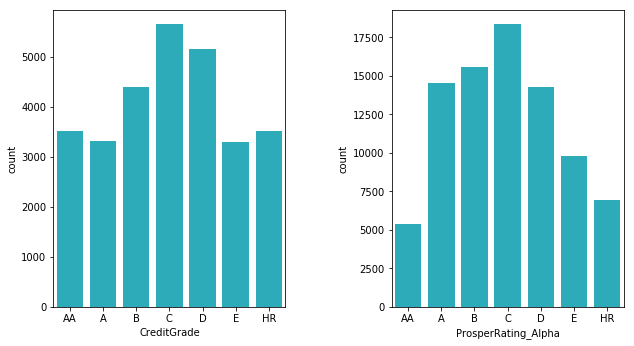

In [20]:
# Comparing both the CreditGrade (before 2009) and ProsperRating_Alpha (after 2009)

cg_order = ['AA','A','B','C','D','E','HR']

lpra_order = ['AA','A','B','C','D','E','HR']

fig, ax = plt.subplots(ncols=2, figsize = [10,6])
default_color = sb.color_palette()[9]

freq = loans['LoanStatus'].value_counts()

# Get the indexes of the Series
status_order = freq.index

default_color = sb.color_palette()[9]

sb.countplot(data=loans, x='CreditGrade', color = default_color, order=cg_order, ax = ax[0])

sb.countplot(data=loans, x='ProsperRating_Alpha', color = default_color, order=lpra_order,ax = ax[1])


# using padding
fig.tight_layout(pad=5.0)

fig.savefig('output4.png', bbox_inches='tight');

plt.show()

The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. The illustrations shows most loans rating lie between A and D (3-6) which is fair enough. Both data a slightly normally distributed

In [21]:
# Returns the sum of all not-null values in `type` column
npra =loans['ProsperRating_Alpha'].value_counts().sum()
nlcg =loans['CreditGrade'].value_counts().sum()

# Return the highest frequency in the `type` column
max_npra = pra[0]
max_nlcg = lcg[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_npra_prop = max_npra / npra
max_nlcg_prop = max_nlcg / nlcg
print(max_npra_prop)
print(max_nlcg_prop)

0.21619742378
0.195109315097


In [22]:
tick_props1 = np.arange(0, max_npra_prop, 0.02)
tick_props2 = np.arange(0, max_nlcg_prop, 0.02)
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names1 = ['{:0.2f}'.format(v) for v in tick_props1]
tick_names2 = ['{:0.2f}'.format(v) for v in tick_props2]
tick_names1, tick_names2 

(['0.00',
  '0.02',
  '0.04',
  '0.06',
  '0.08',
  '0.10',
  '0.12',
  '0.14',
  '0.16',
  '0.18',
  '0.20'],
 ['0.00',
  '0.02',
  '0.04',
  '0.06',
  '0.08',
  '0.10',
  '0.12',
  '0.14',
  '0.16',
  '0.18'])

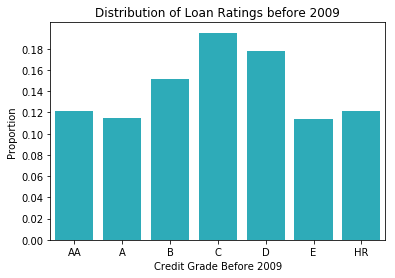

In [23]:
sb.countplot(data=loans, x='CreditGrade', color = default_color, order=cg_order)
# Change the tick locations and labels
plt.yticks(tick_props2 * nlcg, tick_names2)
plt.xlabel('Credit Grade Before 2009')
plt.ylabel('Proportion');
plt.title('Distribution of Loan Ratings before 2009');

fig.savefig('output5.png', bbox_inches='tight');

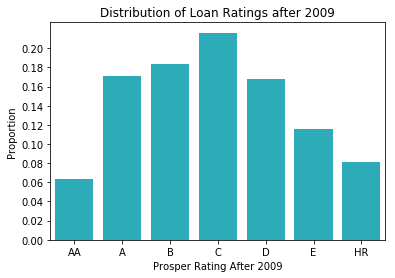

In [24]:
sb.countplot(data=loans, x='ProsperRating_Alpha', color = default_color, order=lpra_order)
# Change the tick locations and labels
plt.yticks(tick_props1 * npra, tick_names1)
plt.xlabel('Prosper Rating After 2009')
plt.ylabel('Proportion');
plt.title('Distribution of Loan Ratings after 2009')

fig.savefig('output6.png', bbox_inches='tight');

In [25]:
loans.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
0.35356     721
0.29776     707
0.15833     652
0.24246     605
0.24758     601
0.12528     559
0.17359     549
0.15324     547
0.27462     534
0.27285     506
0.13799     489
0.15713     482
0.12691     456
0.25781     444
0.20735     433
0.26528     430
0.19501     425
0.20462     420
0.23318     416
0.15629     412
0.11296     409
0.34621     406
0.30564     399
0.20200     395
0.29537     391
           ... 
0.35347       1
0.12251       1
0.01875       1
0.26122       1
0.21403       1
0.18292       1
0.25104       1
0.18294       1
0.34986       1
0.08732       1
0.23361       1
0.08979       1
0.16587       1
0.25723       1
0.27174       1
0.15145       1
0.14609       1
0.23969       1
0.11315       1
0.18494       1
0.09348       1
0.21535       1
0.27000       1
0.13951       1
0.08706       1
0.23014       1
0.22955       1
0.24844       1
0.30775       1
0.23457       1
Name: BorrowerAPR, Lengt

Another important feature we explore here is the `BorrowerAPR`. This is the Borrower's Annual Percentage Rate (APR) for the loan. The insights tells us that on the average the APR lie between 10 and 35%, averagely 20%. Loans APR even go as high as 40%. The might increase the likelihood of incurring bad debts.

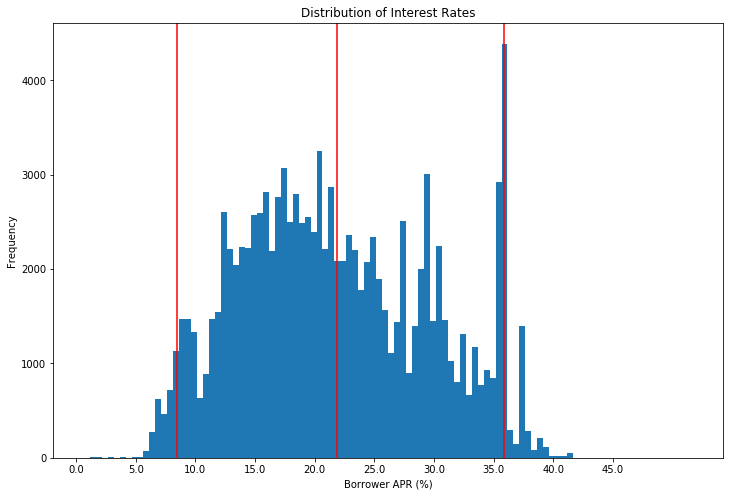

In [26]:
null_apr = loans[loans['BorrowerAPR'].isnull()].index

loans.drop(null_apr, axis = 0, inplace = True)

bapr_bins = np.arange(loans['BorrowerAPR'].min(), loans['BorrowerAPR'].max() + 0.005, 0.005)

mean_APR = loans['BorrowerAPR'].mean()

low_APR = np.percentile(loans['BorrowerAPR'], 2.5)
high_APR = np.percentile(loans['BorrowerAPR'], 97.5)

fig = plt.figure(figsize = [12,8])
ax_2 = plt.hist(data = loans, x = 'BorrowerAPR', bins = bapr_bins)

plt.axvline(x = mean_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = low_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = high_APR, color = 'r', linewidth = 1.5)

x_range = np.arange(0, 0.45 + 0.05, 0.05)
x_label = ['{:.1f}'.format(v * 100) for v in x_range]

plt.xticks(x_range, x_label);
plt.xlabel('Borrower APR (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates');


fig.savefig('output7.png', bbox_inches='tight');

In [27]:
type_counts = loans.ProsperScore.value_counts()
type_counts

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

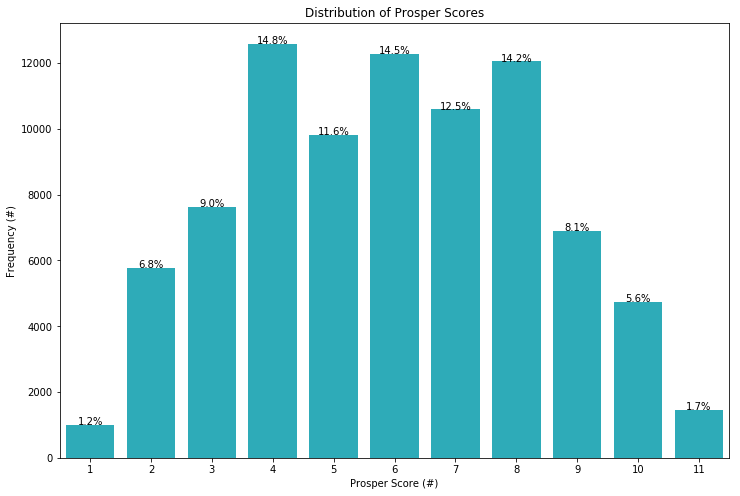

In [28]:
ps_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

type_order = loans['ProsperScore'].value_counts().index

fig = plt.figure(figsize = [12,8])

base_color = sb.color_palette()[9]

ax = sb.countplot(data = loans, x = 'ProsperScore', color = base_color, order = ps_order)

for i in type_order:
    count = type_counts[i]
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    #print(i, ': ', count, ': ', display_val)
    plt.text(i - 1, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xlabel('Prosper Score (#)')
plt.ylabel('Frequency (#)')
plt.title('Distribution of Prosper Scores');

fig.savefig('output8.png', bbox_inches='tight');

In [29]:
loans.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

In [30]:
loans.IsBorrowerHomeowner.value_counts()

True     57478
False    56434
Name: IsBorrowerHomeowner, dtype: int64

In [31]:
type_counts = loans['IsBorrowerHomeowner'].value_counts()
#type_order = type_counts.index

homeowner_ticks = [0, 1]
homeowner_labels = ['No', 'Yes']

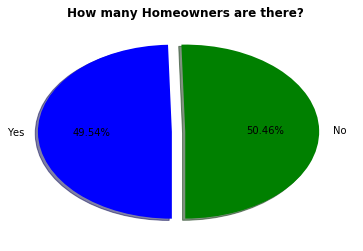

In [32]:
# We're doing a pie plot so that we can compare areas 

plt.pie(loans['IsBorrowerHomeowner'].value_counts(), labels = homeowner_labels, colors=['green', 'blue'], 
        startangle=270, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.2f%%')

plt.title('How many Homeowners are there?', fontweight="bold")

plt.show()

fig.savefig('output9.png', bbox_inches='tight');

In [33]:
loans['ListingCategory'].value_counts()

1     58308
0     16940
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

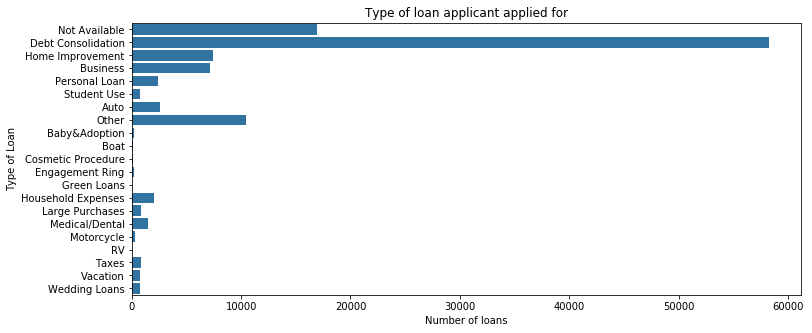

In [34]:
binsize = 1
bins = np.arange(0,21,binsize)
name = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
        'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 
        'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
ticks = np.arange(0,21,1)
default_color = sb.color_palette()[0]

plt.figure(figsize=[12, 5])
sb.countplot(data=loans, y='ListingCategory', color = default_color)
plt.yticks(ticks,name)
plt.xlabel('Number of loans')
plt.ylabel('Type of Loan')
plt.title("Type of loan applicant applied for");


fig.savefig('output10.png', bbox_inches='tight');

This is a bad indicator, Most people are taking Prosper loans to pay off other loans they already incurred. The likelihood of these turning out to be good debt is low as they are current not capable of paying of previous debt themselves.

In [35]:
# Subset the dataframe by selecting features of interest
cols = [ 'BorrowerAPR', 'Term', 'CreditGrade', 'ProsperRating_Alpha', 'EmploymentStatus', 'LoanStatus']
loans_sub = loans[cols]

In [36]:
loans_sub.head()

,BorrowerAPR,Term,CreditGrade,ProsperRating_Alpha,EmploymentStatus,LoanStatus
0,0.16516,36,C,NaN,Self-employed,Completed
1,0.12016,36,NaN,A,Employed,Current
2,0.28269,36,HR,NaN,Not available,Completed
3,0.12528,36,NaN,A,Employed,Current
4,0.24614,36,NaN,D,Employed,Current


In [37]:
loans_sub.describe()

,BorrowerAPR,Term
count,113912.000000,113912.000000
mean,0.218828,40.831308
std,0.080364,10.437112
min,0.006530,12.000000
25%,0.156290,36.000000
50%,0.209760,36.000000
75%,0.283810,36.000000
max,0.512290,60.000000


This just remphasizes that

## Bivariate Exploration

In this section, we investigate relationships between pairs of variables in the prosper loan data. We will be investigating variables we already looked at previously in relation to one another. To start off with, I want to look at the pairwise correlations present between features in the data.

In [38]:
numeric_vars = ['CreditScoreRangeLower', 'AmountDelinquent', 'TotalProsperLoans', 'BorrowerAPR']
categoric_vars = ['EmploymentStatus', 'ListingCategory', 'Term', 'ProsperRating_Alpha']

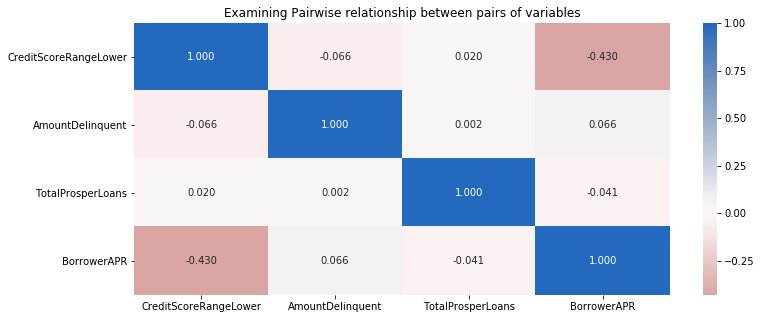

In [39]:
plt.figure(figsize = [12, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Examining Pairwise relationship between pairs of variables');
plt.show()


fig.savefig('output11.png', bbox_inches='tight');

As expected, there is a negative correlation between Credit Score and Borrower APR since the lower the credit score, the higher the borrower APR in case of delinquencies. However, there is no significant correlation between TotalProsperLoans vs Amount deliquent.

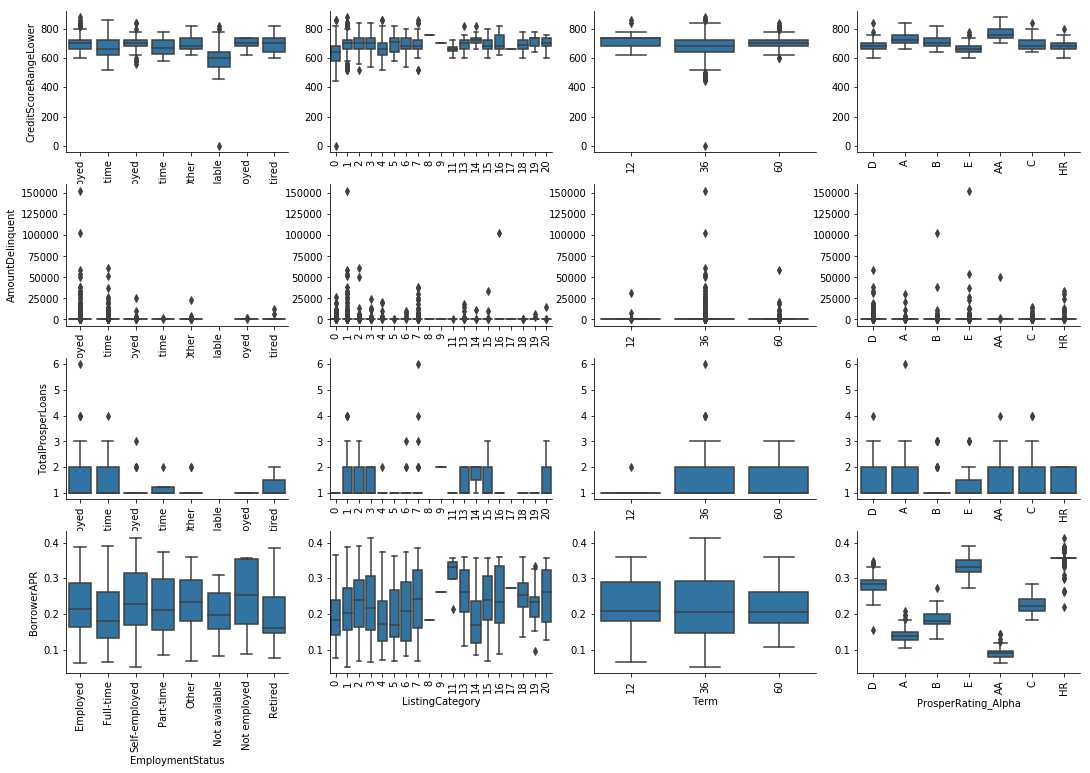

In [40]:
samples = np.random.choice(loans.shape[0], 2000, replace = False)
df_samp = loans.reindex(index = samples)

def boxgrid(x, y, **kwargs):
#Quick hack for creating box plots with seaborn's PairGrid
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars , x_vars = categoric_vars,
             aspect = 1.5)
g.map(boxgrid)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]

# using padding
fig.tight_layout(pad=5.0)

plt.show();

fig.savefig('output12.png', bbox_inches='tight');

#### 

Not surprisingly that those with 0 or not displayed income are those with the most amount of days delinquent as they are unlikely to pay back the interest rate due to no income. However, those with 0 income has the best credit score among the rest which is interesting and required some further attention.

Those who has EmploymentStatus as unknown has the most amount of days delinquent and may be also associated to those not displayed in income range. They also have the lowest mean in credit score among the rest.

## Now how are other variables related?

#### Borrower APR vs Loan Status

> Noticeably higher Borrower APR as we get worse in loan status
> Defaulted and Chargedoff loans have a Borrower APR above average
> Completed and Current loans have a Borrower APR below average
> To get the highest Borrower APR, get the loan Past Due (> 120 days) or Chargedoff

In [41]:
# convert LoanStatus, CreditGrade into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 
                                   'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [42]:
# Create Borrower APR y-axis labels

borrowerAPR_ticks = np.arange(0, 0.55, 0.05)
borrowerAPR_labels = ['{:.1f}'.format(v * 100) for v in borrowerAPR_ticks]

print(borrowerAPR_ticks)
print(borrowerAPR_labels)

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]
['0.0', '5.0', '10.0', '15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0']


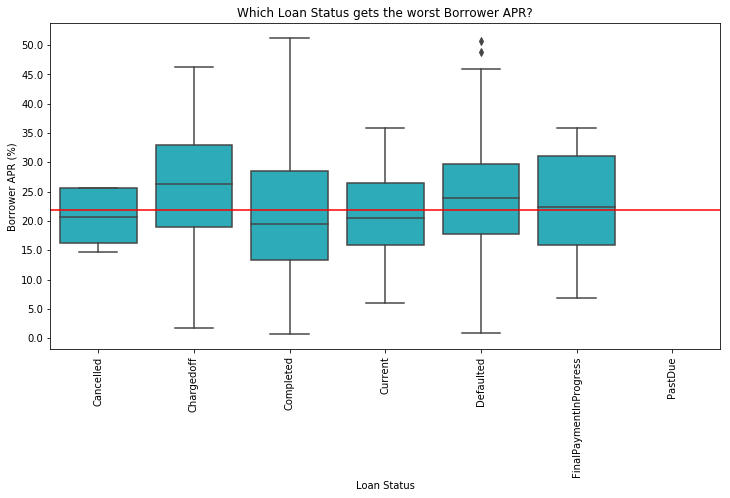

In [43]:
fig = plt.figure(figsize = [12,6])

ax_10 = sb.boxplot(data = loans, x = 'LoanStatus', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)

plt.xlabel('Loan Status')
plt.ylabel('Borrower APR (%)')

plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)
plt.title('Which Loan Status gets the worst Borrower APR?');

fig.savefig('output13.png', bbox_inches='tight');

#### Prosper Score vs Loan Status
Average Prosper Score of 6.
For the highest Borrower APR, get a Prosper Score of 5 or below (Defaulted and Chargedoff)

In [44]:
prosper_subset = loans[loans['ProsperScore'].isnull() == False]

In [45]:
ps_mean = loans['ProsperScore'].mean()

In [46]:
ps_ticks = np.arange(1, 12, 1)
ps_labels = ['{}'.format(v) for v in ps_ticks]

print(ps_ticks)
print(ps_labels)

[ 1  2  3  4  5  6  7  8  9 10 11]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


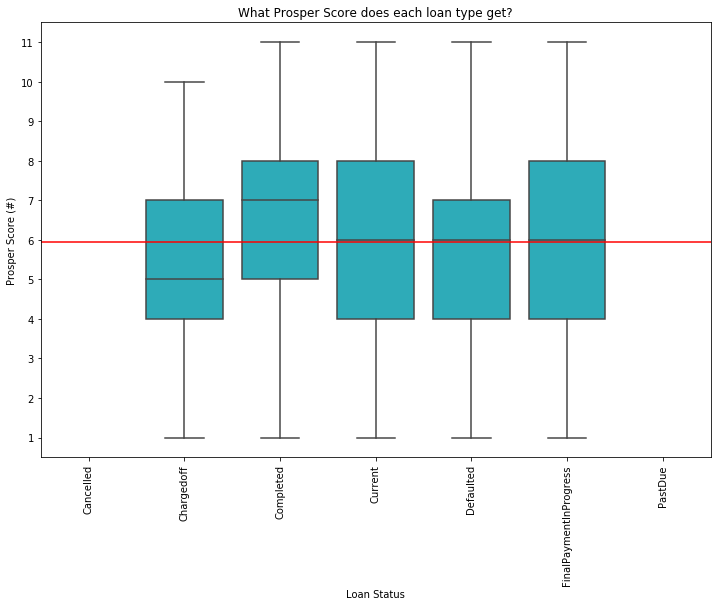

In [47]:
fig = plt.figure(figsize = [12,8])

ax = sb.boxplot(data = loans, x = 'LoanStatus', y = 'ProsperScore',
           color = base_color)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90)
plt.xlabel('Loan Status')

plt.yticks(ps_ticks, ps_labels)
plt.ylabel('Prosper Score (#)')
plt.title('What Prosper Score does each loan type get?');

fig.savefig('output14.png', bbox_inches='tight');

In [48]:
y_ticks = np.arange(0, 0.5 + 0.05, 0.05)
y_labels = ['{:.2f}'.format(v) for v in y_ticks]

In [49]:
gclasses = pd.api.types.CategoricalDtype(ordered = True, categories = cg_order)
loans['CreditGrade'] = loans['CreditGrade'].astype(gclasses)
loans['ProsperRating_Alpha)'] = loans['ProsperRating_Alpha'].astype(gclasses)
loans['ProsperScore'] = loans['ProsperScore'].astype(gclasses)

Next, we should ask the following question:

#### What the relationship between EmploymentStatus and MonthlyLoanPayment would look like?

## Multivariate Exploration

We see best type of loans given to full-time employed customers but it is also quite likely to be chargedoff. The below multivariate shows several indicators:

It seems that there is no correlation between Cancelled loans, PastDue and Borrower APR.

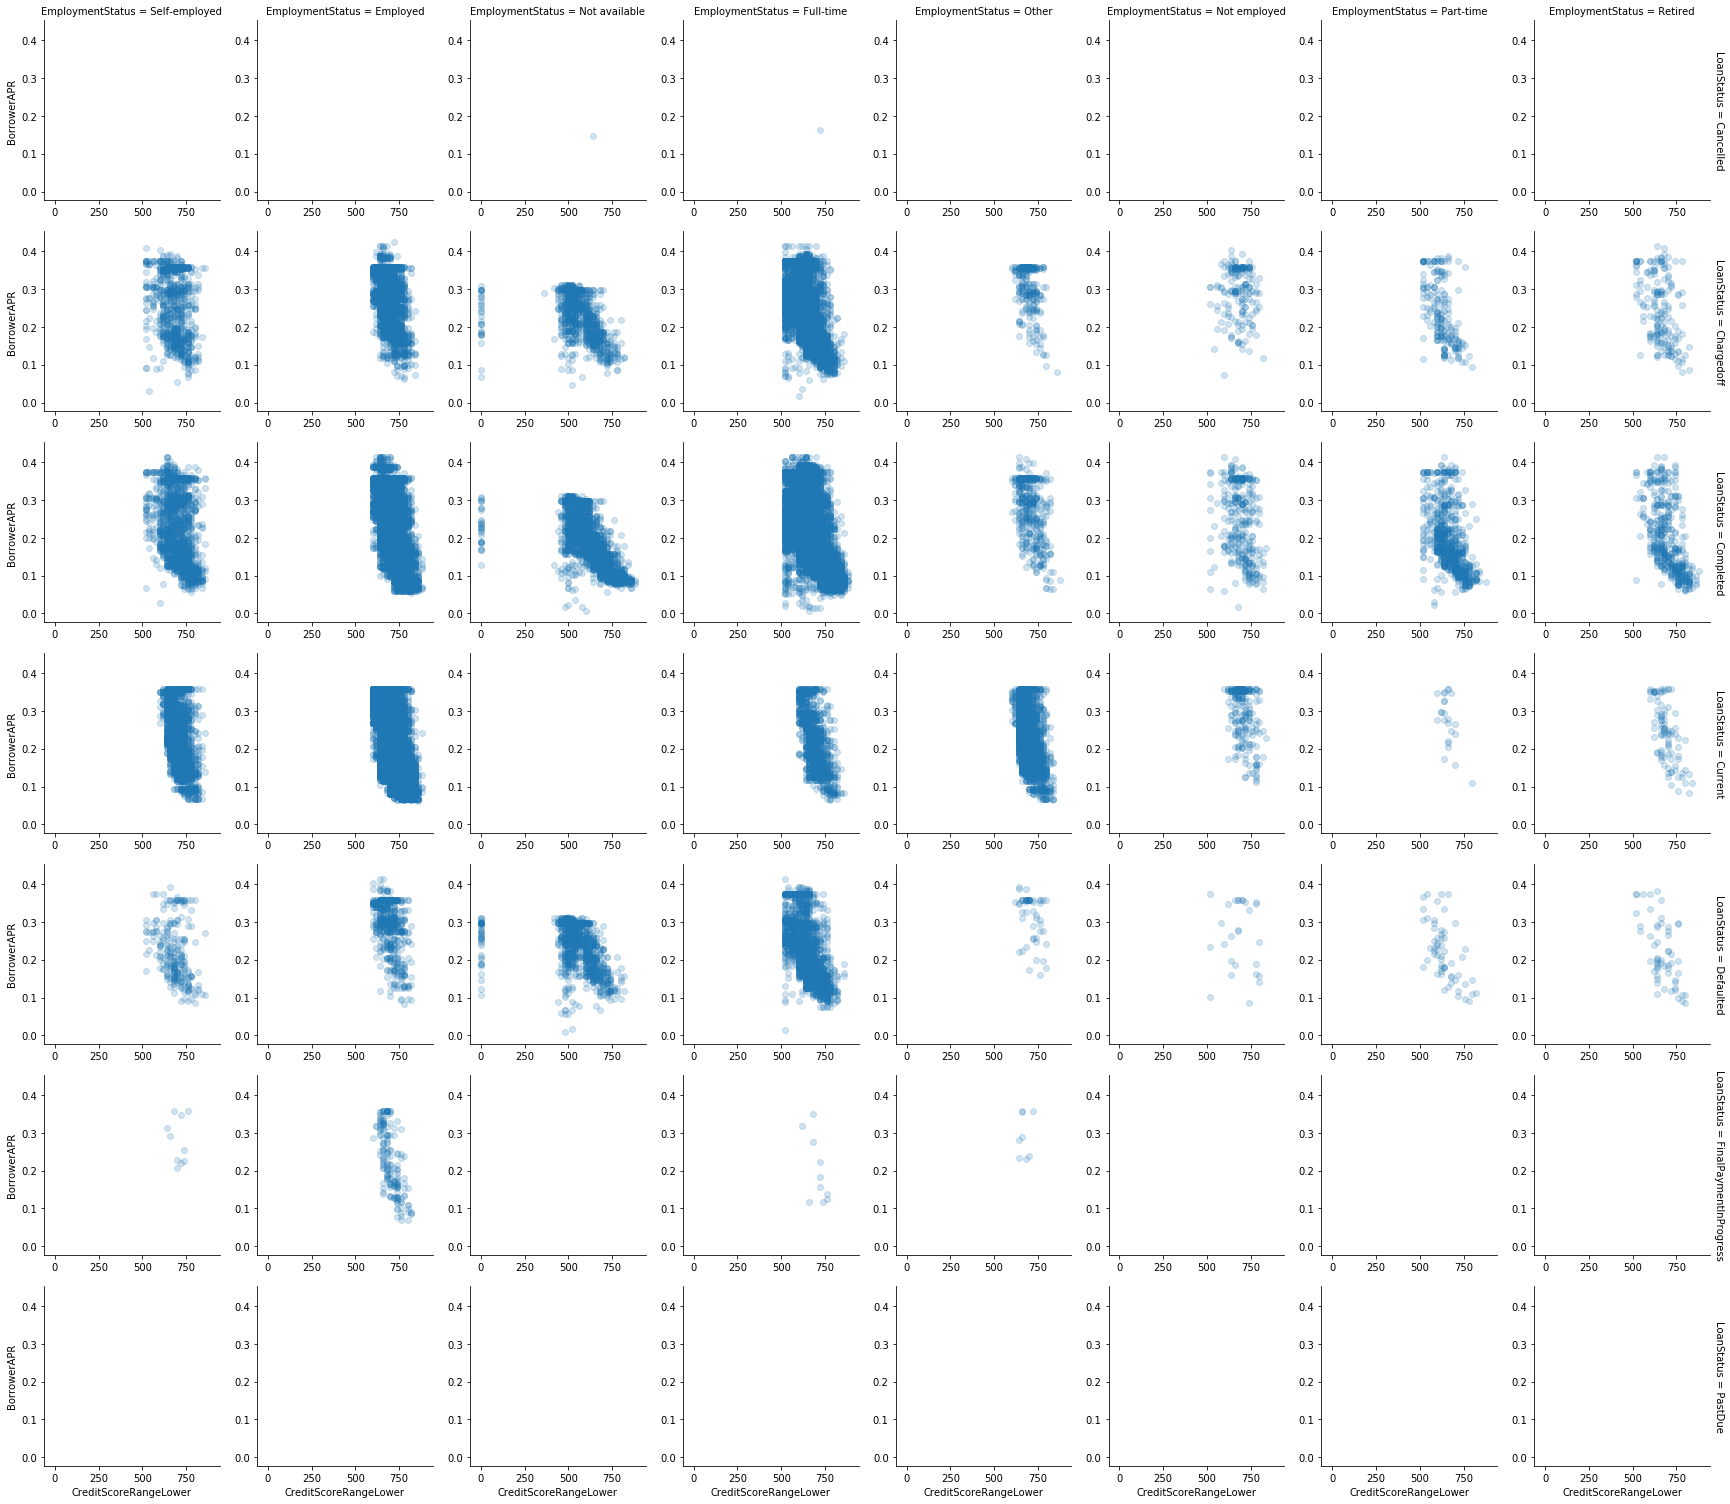

In [50]:
g = sb.FacetGrid(data = loans, col = 'EmploymentStatus', row = 'LoanStatus', 
                margin_titles = True)
g.map(plt.scatter, 'CreditScoreRangeLower', 'BorrowerAPR', alpha = 1/5);

fig.savefig('output15.png', bbox_inches='tight');

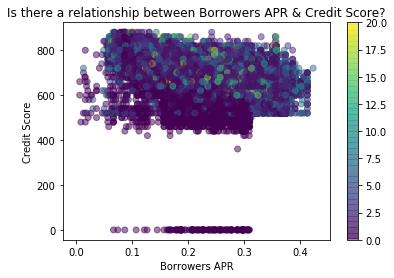

In [51]:
plt.scatter(data = loans, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', c = 'ListingCategory', alpha = 1/2)
plt.colorbar()
plt.ylabel('Credit Score')
plt.xlabel('Borrowers APR');
plt.title('Is there a relationship between Borrowers APR & Credit Score?');

fig.savefig('output16.png', bbox_inches='tight');

Using a pairgrid does not provide us much information, however, when we used a simple scatter plot Borrowers APR vs Credit Score while using Listing Category as the color bar, it provides us a different view. 

Recall, The CreditScoreRangeLower represents data for lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency. Also, the category of the listing that the borrower selected when posting their listing is indicated by: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The scatter plot above shows that the borrower's credit score and the borrower APR has no corellation in  themselves. as shown the darker purple at the top indicating high credit scores and borrowing for debt consolidation 

This shows us that high credit score does not mean borrowing for other reasons other than debt repayment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of borrower APR against loan status by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan status turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?
A surprising interaction is that the Borrower APR and loan status is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.


## Conclusions 

- How to get the highest Borrower APR)
- Have the loan Chargedoff
- Get a Prosper Score between 1 and 2 (Definitely 5 or below)
- Obtain a Credit Rating of HR or E
- Put Not employed or Employed (With a Credit Rating of HR) on the loan application, under Employment Status
- Get a Credit Score below 640
- Say you're not a Homeowner

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0